In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist

url = 'https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/06.%20Week%206/Datasets/clusteringcampaign.csv'
df = pd.read_csv(url, sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
# Hapus kolom yang tidak perlu atau tidak numerik
df = df.drop(columns=['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], errors='ignore')

# Cek tipe data
print(df.dtypes)

# Label Encoding untuk kolom kategorikal
label_cols = ['Education', 'Marital_Status']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# Tangani missing value jika ada
df = df.dropna()

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
dtype: object


##Metode Elbow untuk KMeans

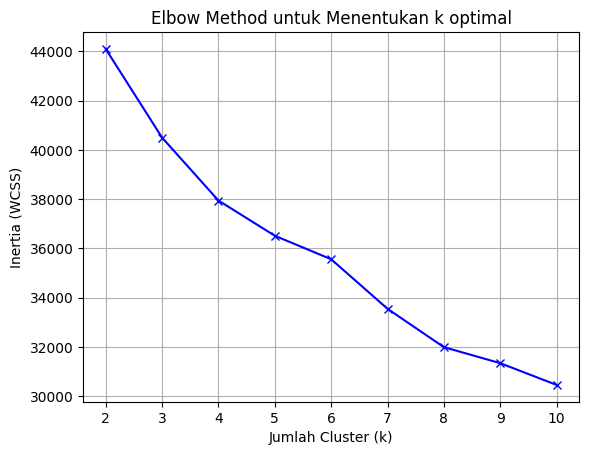

In [6]:
inertia = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method untuk Menentukan k optimal')
plt.grid()
plt.show()

##Evaluasi Metrik

In [7]:
def evaluate_clustering(X, labels):
    sil = silhouette_score(X, labels)
    ch = calinski_harabasz_score(X, labels)
    db = davies_bouldin_score(X, labels)
    return sil, ch, db

##Evaluasi 2 Model (KMeans dan Agglomerative)

In [8]:
results = []
for k in range(2, 11):
    # KMeans
    km = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    km_labels = km.labels_
    km_metrics = evaluate_clustering(X_scaled, km_labels)

    # Agglomerative
    agg = AgglomerativeClustering(n_clusters=k).fit(X_scaled)
    agg_labels = agg.labels_
    agg_metrics = evaluate_clustering(X_scaled, agg_labels)

    results.append([k, 'KMeans', *km_metrics])
    results.append([k, 'Agglomerative', *agg_metrics])

results_df = pd.DataFrame(results, columns=['k', 'Model', 'Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin'])
print(results_df)

     k          Model  Silhouette  Calinski-Harabasz  Davies-Bouldin
0    2         KMeans    0.241766         567.408741        1.850421
1    2  Agglomerative    0.239387         488.759158        1.960941
2    3         KMeans    0.167019         407.191996        2.243590
3    3  Agglomerative    0.108269         332.842585        2.474761
4    4         KMeans    0.168307         339.245848        2.173071
5    4  Agglomerative    0.119982         288.512747        2.503446
6    5         KMeans    0.098112         285.941297        2.333976
7    5  Agglomerative    0.122309         261.760031        2.137488
8    6         KMeans    0.096238         246.660083        2.380013
9    6  Agglomerative    0.131829         249.764143        1.954166
10   7         KMeans    0.099595         239.863942        2.101672
11   7  Agglomerative    0.139046         240.209137        1.859726
12   8         KMeans    0.110731         230.864180        1.904093
13   8  Agglomerative    0.134283 

##Visualisasi

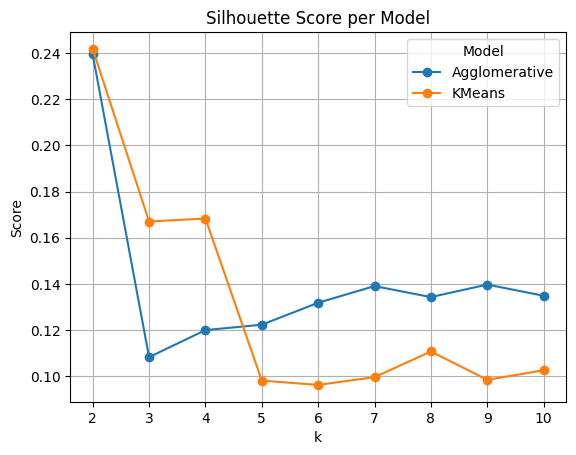

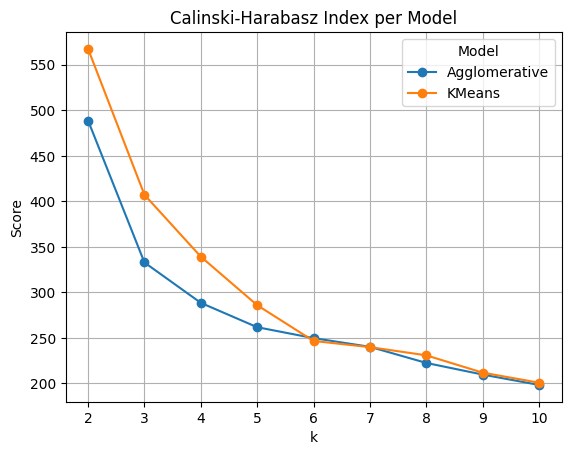

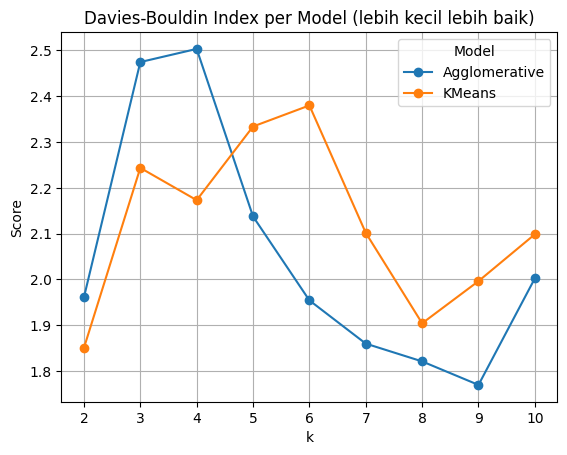

In [9]:
pivot_df = results_df.pivot(index='k', columns='Model')

pivot_df['Silhouette'].plot(marker='o', title='Silhouette Score per Model')
plt.ylabel('Score')
plt.grid()
plt.show()

pivot_df['Calinski-Harabasz'].plot(marker='o', title='Calinski-Harabasz Index per Model')
plt.ylabel('Score')
plt.grid()
plt.show()

pivot_df['Davies-Bouldin'].plot(marker='o', title='Davies-Bouldin Index per Model (lebih kecil lebih baik)')
plt.ylabel('Score')
plt.grid()
plt.show()

##**Penjelasan Matematis**

### 1. Inertia / WCSS (Within-Cluster Sum of Squares)

**Inertia**, atau **WCSS**, adalah ukuran seberapa padat *cluster* yang terbentuk. Metrik ini menghitung total kuadrat jarak antara setiap titik data dan *centroid* (titik tengah) *cluster*-nya.

Rumusnya adalah:

$$WCSS = \sum_{i=1}^{k} \sum_{x_j \in C_i} ||x_j - \mu_i||^2$$

Di mana:
* $C_i$: *cluster* ke-$i$.
* $\mu_i$: *centroid* dari *cluster* ke-$i$.

**Tujuan utamanya** adalah untuk meminimalkan nilai WCSS. Semakin kecil nilainya, berarti titik-titik data dalam setiap *cluster* semakin dekat dengan *centroid*-nya, menunjukkan *cluster* yang lebih padat dan kohesif.

### 2. Silhouette Score

**Silhouette Score** adalah metrik yang mengevaluasi seberapa mirip suatu objek dengan *cluster*-nya sendiri (kohesi) dibandingkan dengan *cluster* lainnya (pemisahan). Nilainya berkisar antara -1 hingga 1.

Rumusnya adalah:

$$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$$

Di mana:
* $a(i)$: Rata-rata jarak antara titik data $i$ dengan semua titik lain di dalam *cluster* yang sama.
* $b(i)$: Rata-rata jarak antara titik data $i$ dengan semua titik di *cluster* terdekat yang berbeda.

**Interpretasi**:
* Nilai mendekati **1** menunjukkan bahwa titik data berada di *cluster* yang sesuai dan jauh dari *cluster* lain.
* Nilai mendekati **0** menunjukkan bahwa titik data berada di perbatasan dua *cluster*.
* Nilai mendekati **-1** menunjukkan bahwa titik data mungkin telah ditempatkan di *cluster* yang salah.

Semakin tinggi nilai Silhouette Score, semakin baik kualitas *clustering*-nya.

### 3. Calinski-Harabasz Index

**Calinski-Harabasz Index** adalah metrik yang mengukur rasio antara dispersi (penyebaran) antar-*cluster* dan dispersi di dalam *cluster*.

Rumusnya adalah:

$$CH = \frac{\text{between-cluster dispersion}}{\text{within-cluster dispersion}} \times \frac{n - k}{k - 1}$$

Di mana:
* *Between-cluster dispersion* mengukur seberapa jauh *cluster* satu sama lain.
* *Within-cluster dispersion* mengukur seberapa padat titik-titik di dalam *cluster*.
* $n$: Jumlah total titik data.
* $k$: Jumlah *cluster*.

**Interpretasi**: Semakin tinggi nilai Calinski-Harabasz Index, semakin baik pemisahan antar *cluster* dan semakin padat *cluster*-nya.

### 4. Davies-Bouldin Index

**Davies-Bouldin Index** mengukur rata-rata "kesamaan" antara setiap *cluster* dengan *cluster* yang paling mirip dengannya. Kesamaan diukur sebagai rasio antara ukuran *cluster* (dispersi di dalam *cluster*) dan jarak antar *cluster*.

Rumusnya adalah:

$$DB = \frac{1}{k} \sum_{i=1}^{k} \max_{j \ne i} \left( \frac{\sigma_i + \sigma_j}{d_{ij}} \right)$$

Di mana:
* $\sigma$: Rata-rata jarak antara titik data dan *centroid* dalam suatu *cluster*. Ini mengindikasikan ukuran atau kepadatan *cluster*.
* $d_{ij}$: Jarak antara *centroid* *cluster* $i$ dan *cluster* $j$.

**Interpretasi**: Semakin kecil nilai Davies-Bouldin Index, semakin baik *clustering*-nya. Ini berarti *cluster* terbentuk dengan baik, padat di dalamnya, dan terpisah jauh satu sama lain.